In [20]:
#Import libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt#visualization
import plotly
%matplotlib inline

import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
df = pd.read_csv(r'Telco-Customer-Churn.csv')

## Data Overview

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Rows :" , df.shape[0], "; Columns :" , df.shape[1])
print("\nFeatures : \n" , df.columns.tolist())

Rows : 7043 ; Columns : 21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
#we can find that the type of 'SeniorCitizen','tenure' and 'TotalCharges' need to be modified.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#missing value
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop=True)

,column_name,percent_missing
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


In [7]:
#data manipulation:
df1 = df.copy()
#dealing with missing values:
#Replacing spaces with null in 'TotalCharges' column
df1 = df1.replace(" ", np.nan)
#missing value
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop=True)

,column_name,percent_missing
0,customerID,0.000000
1,gender,0.000000
2,SeniorCitizen,0.000000
3,Partner,0.000000
4,Dependents,0.000000
5,tenure,0.000000
6,PhoneService,0.000000
7,MultipleLines,0.000000
8,InternetService,0.000000
9,OnlineSecurity,0.000000


In [8]:
#since the percentage of missing value in 'TotalCharges' is only 0.15%, we can just drop them
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)

In [9]:
#Adjust the type of SeniorCitizen, TotalCharges, change tenure in the modeling part 
#convert 'TotalCharges' to float type
df1["TotalCharges"] = df1["TotalCharges"].astype(float)
#replace values in 'SeniorCitizen' to be line with other categorical variables
df1["SeniorCitizen"] = df1["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [10]:
#check the data types
df1.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
#Take a look at unique values for all the categorical variables except for 'customerID' column
obj_var = df1.select_dtypes(['object'])

In [12]:
def unique_value(col):
    print(col, ":" , df1[col].unique())
for i in range(1,len(obj_var.columns)):
    unique_value(obj_var.columns[i])

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
#replace 'No internet service' to 'No' for the following columns
replace_list = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_list : 
    df1[i]  = df1[i].replace({'No internet service' : 'No'})

In [14]:
#Total number of online services that each customer has signed up for 
df1['OnlineServices_Count'] = (df1[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

Text(0, 0.5, 'Number of Customers')

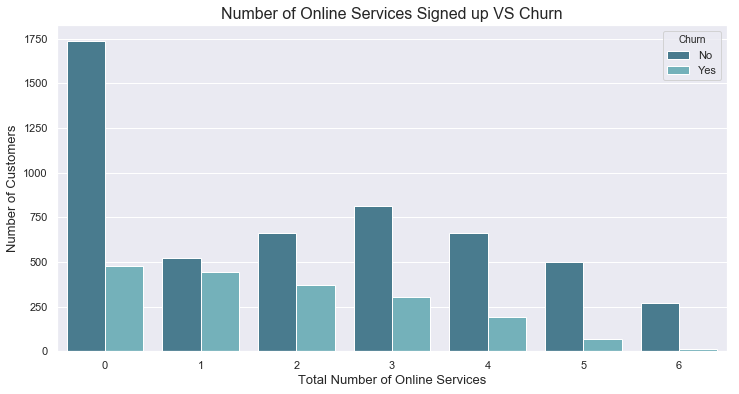

In [15]:
#style.use('ggplot')
#palette=("Blues_d")
#sns.set(font_scale=2)
sns.set(style="darkgrid")
#sns.set_context("poster")
plt.figure(figsize=(12,6))
ax = sns.countplot(x='OnlineServices_Count', hue='Churn', data=df1, palette=("GnBu_d"))
ax.set_title('Number of Online Services Signed up VS Churn', fontsize=16)
ax.set_xlabel('Total Number of Online Services', fontsize=13)
ax.set_ylabel('Number of Customers', fontsize=13)

We can see that customers who did not sign up for any Online services are churning with least percentage and customers who signed up for only one Online Service are churning with the highest percentage. And the percentage of churn is decreasing as the number of online services increase from 2.

Text(0, 0.5, 'Average Monthly Charges')

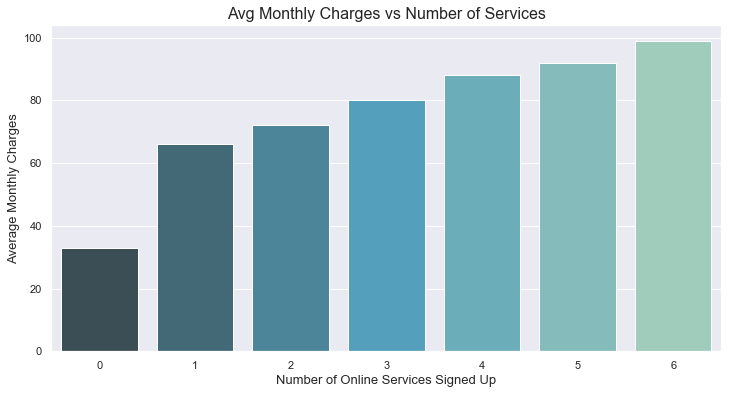

In [16]:
agg = df1.replace('Yes',1).replace('No', 0).groupby('OnlineServices_Count', as_index=False)[['MonthlyCharges']].mean()
agg[['MonthlyCharges']] = np.round(agg[['MonthlyCharges']], 0)

plt.figure(figsize=(12,6))
ax = sns.barplot(y='MonthlyCharges', x='OnlineServices_Count', data=agg, palette=("GnBu_d"))
ax.set_title('Avg Monthly Charges vs Number of Services', fontsize=16)
ax.set_xlabel('Number of Online Services Signed Up', fontsize=13)
ax.set_ylabel('Average Monthly Charges',  fontsize=13)

We find that Customers who does not use any internet service are paying just 33 dollars, while those who with one service are paying double which is 66 dollars. As the number of services used increases, the Average Monthly Charges are increasing linearly.

Text(0, 0.5, 'Monthly Charges')

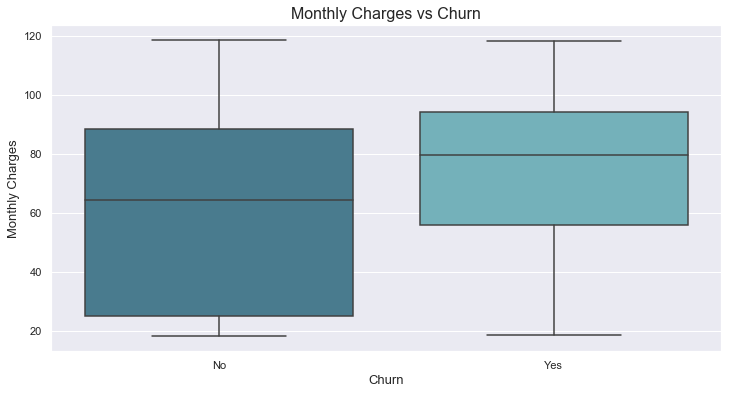

In [17]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df1, palette=("GnBu_d"))
ax.set_title('Monthly Charges vs Churn', fontsize=16)
ax.set_xlabel('Churn', fontsize=13)
ax.set_ylabel('Monthly Charges', fontsize=13)

Through these two boxplots, we can find that the higher the monthly charges, the more is the possibility of Churning. Customers who are not churnig are paying over 60 dolars, while customets who are churning are paying about 80 dollars.

Text(0.5, 0, 'Tenure in Months')

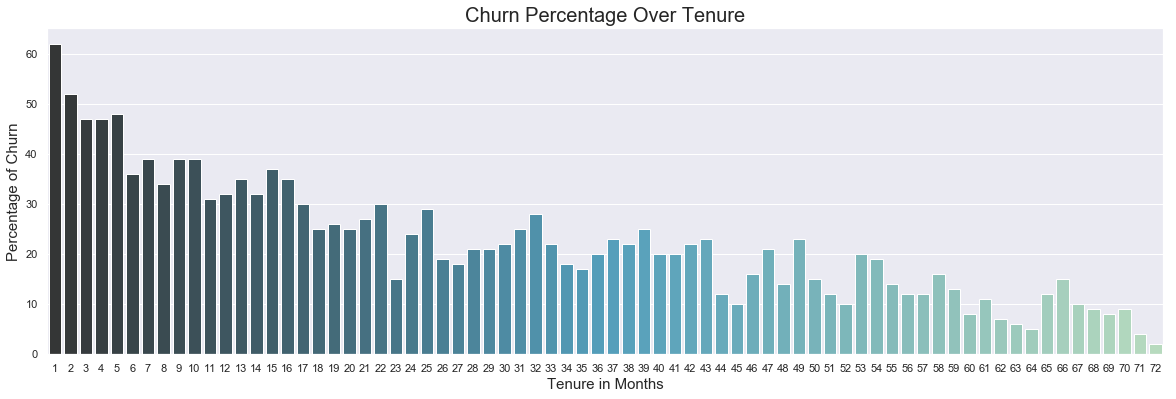

In [18]:
#churn and tenure
agg = df1.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
agg['Churn'] = np.round(agg['Churn'], 2) * 100

plt.figure(figsize=(20,6))

ax = sns.barplot(x='tenure', y='Churn', data = agg, palette=("GnBu_d"))
sns.set_style("whitegrid", {'axes.grid' : False})
ax.set_title('Churn Percentage Over Tenure', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15)

From the plot above, we can find that as the number of months increases, the probability of churn is gradually decreasing from the overall tenure perspective.

In [21]:
agg = df1.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
agg['Churn'] = np.round(agg['Churn'], 2) * 100

trace = go.Scatter(x = agg["tenure"],y = agg["Churn"],
                   mode = "markers+lines",
                  marker = dict(color = "red",size = 9,
                                line = dict(color = "black",width =2)))
#layout
layout = go.Layout(dict(title = "Churn Percentage Over Tenure",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "tenure",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Churn",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

fig = go.Figure(data = [trace],layout = layout)
plotly.offline.iplot(fig)

In [22]:
agg = df1.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
agg = agg[agg.tenure < 25]
agg['Churn'] = np.round(agg['Churn'], 2) * 100

trace = go.Scatter(x = agg["tenure"],y = agg["Churn"],
                   mode = "markers+lines",
                  marker = dict(color = "red",size = 9,
                                line = dict(color = "black",width =2)))
#layout
layout = go.Layout(dict(title = "Churn Trend within 24 months",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "tenure",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Churn",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

fig = go.Figure(data = [trace],layout = layout)
plotly.offline.iplot(fig)

From the above plot, we can find that over 60% of customers who churn in one month and the churn probability reduces to about 25% at the end of 24 months.

In [23]:
#Separating churn and non churn customers
churn     = df1[df1["Churn"] == "Yes"]
non_churn = df1[df1["Churn"] == "No"]

In [24]:
def pie_chart(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = non_churn[column].value_counts().values.tolist(),
                    labels  = non_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non Churn Customers" 
                   )
    layout = go.Layout(dict(title = column + " Distribution in Customers",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    plotly.offline.iplot(fig)

In [25]:
def bar_chart(column):
#explore churn and payment method
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x="Churn", hue=column, data=df1, palette=("GnBu_d"));
    #sns.palplot(sns.color_palette("Set2"))
    #sns.palplot(sns.color_palette("Blues"))
    ax.set_title('Churn by '+ column, fontsize=20)
    ax.set_xlabel('Churn', fontsize = 15)
    ax.set_ylabel('Number of Customers Churned', fontsize = 15)

In [26]:
#Exploring'Contract' distribution with 'Churn'
pie_chart('Contract')

The left donut pie chart indicating the percentage of customers who are churning, we can see that customers with Month-to-Month contract are churning most with 88.6%, while customers with two-year contract are churning least with only 2.57%.

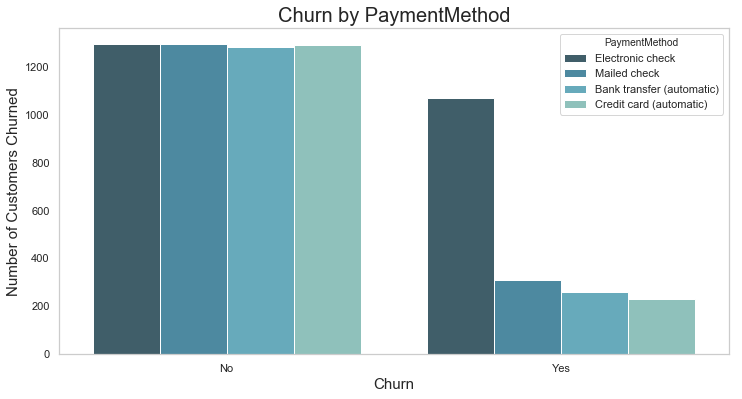

In [27]:
#explore churn and payment method
bar_chart('PaymentMethod')

In [28]:
df1.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

From the left hand side plot, we can see that the percentage of non-churning customers among 4 types of payment method are almost the same. However,customers who use Electronic Check as payment method are churning most in the right hand side plot.

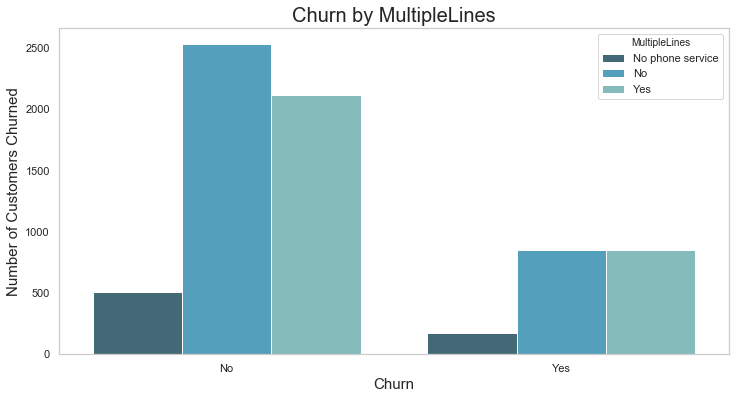

In [29]:
#Explore Churn and MultipleLines
bar_chart('MultipleLines')

From the plot above, we can see that customers without MultipleLines(including no phone service) are churing in higher proportion.

In [30]:
services = df1[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
services.replace('Yes', 1, inplace=True)
services.replace('No', 0, inplace=True)
services = services[services.OnlineSecurity !='No internet service']             
agg = services.groupby('Churn', as_index=False)[['OnlineSecurity', 
    'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

Text(0.5, 1.0, 'Which Service Customers Churn Higher')

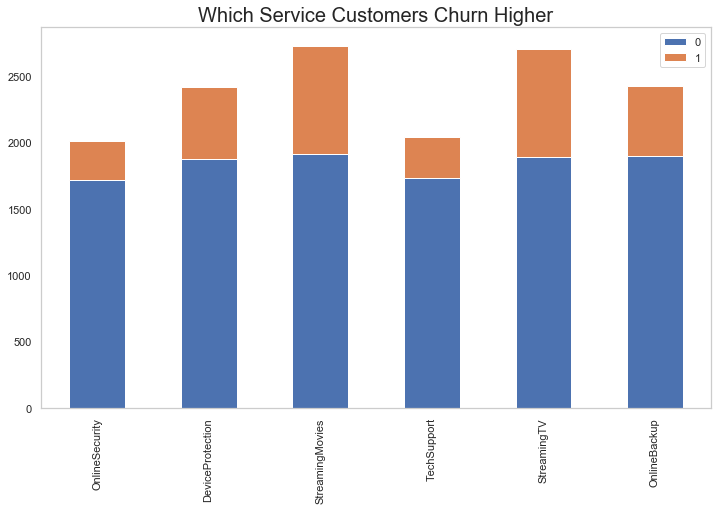

In [31]:
ax = agg.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,7))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Which Service Customers Churn Higher', fontsize=20)

We can find that customers who are using Streaming Movies and StreamingTV are churning in higher proportions.

In [32]:
#explore Internet service distribution
pie_chart('InternetService')

We can find that Customers with Fiber Optic internet service are churning in the most proportion with 69.4%.

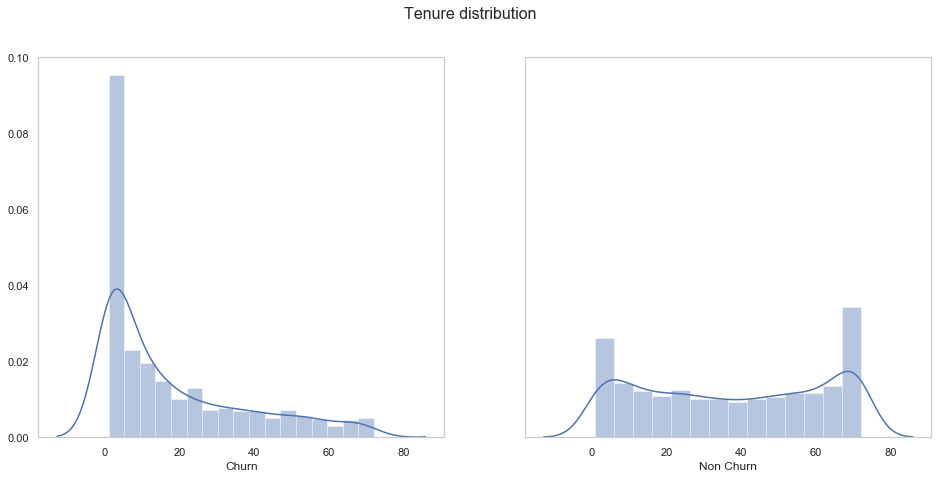

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16,7), sharey=True, sharex=True)
sns.set(style="darkgrid")

sns.distplot(churn["tenure"], ax=ax[0])
sns.distplot(non_churn["tenure"] , ax=ax[1])
        
ax[0].set_xlabel('Churn', size=12)
ax[1].set_xlabel('Non Churn', size=12)

fig.suptitle("Tenure distribution", fontsize=16)
plt.show()

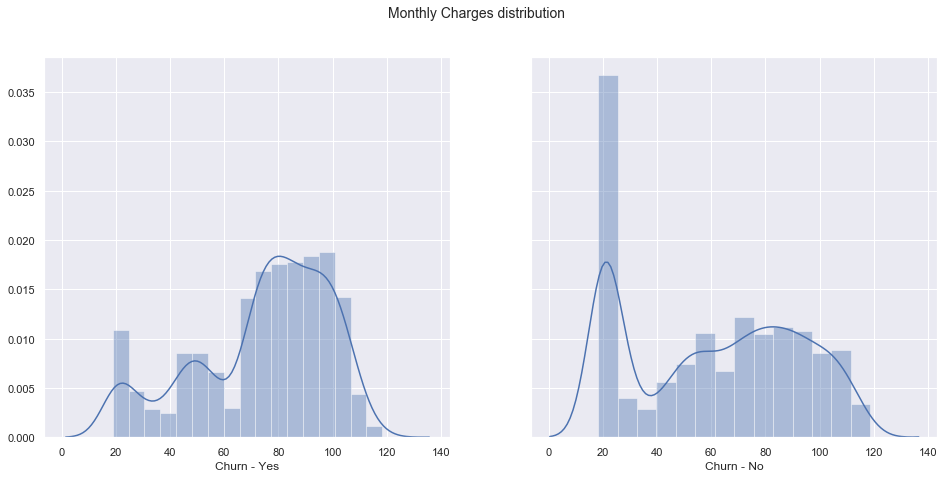

In [34]:
#monthly charges distribution
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(16,7), sharey=True, sharex=True)

sns.distplot(churn["MonthlyCharges"], ax=ax[0])
sns.distplot(non_churn["MonthlyCharges"], ax=ax[1])
        
ax[0].set_xlabel('Churn - Yes', size=12)
ax[1].set_xlabel('Churn - No', size=12)

fig.suptitle("Monthly Charges distribution", fontsize=14)
plt.show()

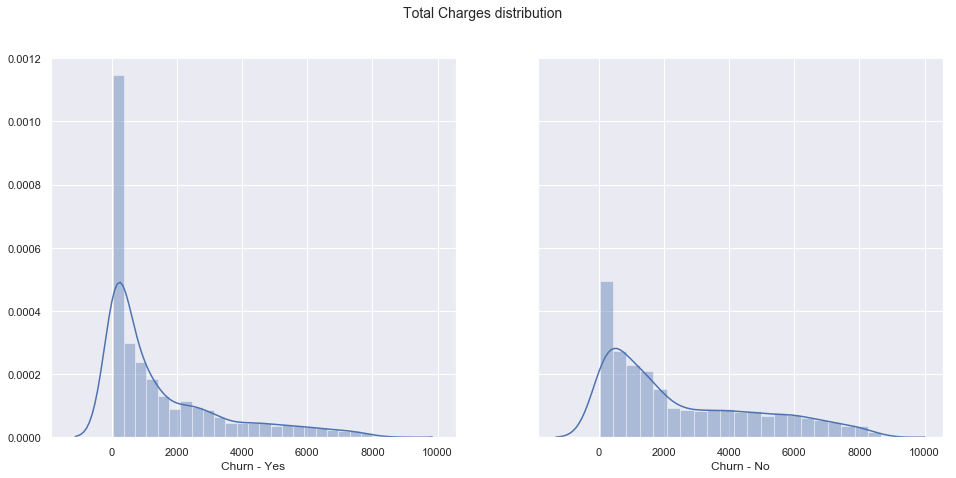

In [35]:
#total charges distribution
fig, ax = plt.subplots(1, 2, figsize=(16,7), sharey=True, sharex=True)

sns.distplot(churn["TotalCharges"] , ax=ax[0])
sns.distplot(non_churn["TotalCharges"] ,ax=ax[1])
        
ax[0].set_xlabel('Churn - Yes', size=12)
ax[1].set_xlabel('Churn - No', size=12)

fig.suptitle("Total Charges distribution", fontsize=14)
plt.show()

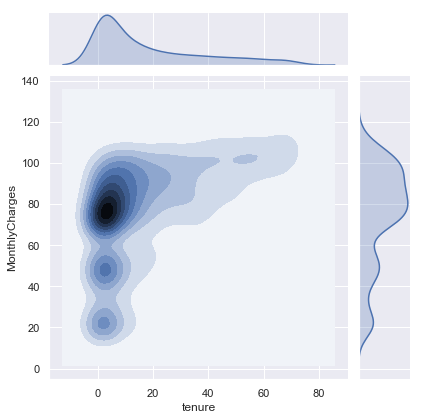

In [36]:
a = sns.jointplot("tenure", "MonthlyCharges", data=churn, kind="kde")

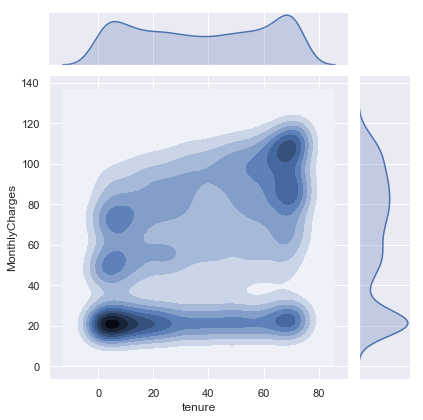

In [37]:
b = sns.jointplot(x="tenure", y="MonthlyCharges", data=non_churn, kind="kde")

From above two plots, we can find that Churned data points are concentrated in high monthly charges(around 80) and low tenure(around 0).
Howerver, non churn data are concentrated in two centers. The first one is low monthly charges(around 20) and low tenure(around 0) and the second one is both high monthly charges(around 110) and high tenure(around 70).

In [38]:
df2 = df1.copy()

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
customerID              7032 non-null object
gender                  7032 non-null object
SeniorCitizen           7032 non-null object
Partner                 7032 non-null object
Dependents              7032 non-null object
tenure                  7032 non-null int64
PhoneService            7032 non-null object
MultipleLines           7032 non-null object
InternetService         7032 non-null object
OnlineSecurity          7032 non-null object
OnlineBackup            7032 non-null object
DeviceProtection        7032 non-null object
TechSupport             7032 non-null object
StreamingTV             7032 non-null object
StreamingMovies         7032 non-null object
Contract                7032 non-null object
PaperlessBilling        7032 non-null object
PaymentMethod           7032 non-null object
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null 

In [40]:
df2.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
#Add new feature - Internet(Yes- have internet service, No- do not have internet service)
df2['Internet'] = df2['InternetService'].apply(lambda x : x if x=='No' else 'Yes')

In [42]:
df2.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [43]:
#Classify 'Tenure' into different categories
def tenure_category(tenure):
    if tenure <=12:
        return '0-12'
    elif (tenure>12) & (tenure<=24):
        return '12-24'
    elif (tenure>24) & (tenure<=36):
        return '24-36'
    elif (tenure>36) & (tenure<=48):
        return '36-48'
    elif (tenure>48) & (tenure<=60):
        return '48-60'
    else:
        return 'above_60'

In [44]:
df2['tenure_category'] = df2['tenure'].map(tenure_category)

In [45]:
#data preprocessing to make the data ready for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#categorical variable
obj_df = df2.select_dtypes(include=['object']).copy()
#categorical variables needed to be encoded for modeling
cat_var = obj_df.drop(['customerID', 'InternetService'], axis=1).columns.tolist()
#numerical variable
num_var   = ['MonthlyCharges', 'TotalCharges', 'OnlineServices_Count']
#Binary variables with 2 values
bin_var   = obj_df.nunique()[obj_df.nunique() == 2].keys().tolist()
#Columns more than 2 levels
multi_var = [i for i in cat_var if i not in bin_var]

In [46]:
df2.Churn.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [47]:
df2.dtypes

customerID               object
gender                   object
SeniorCitizen            object
Partner                  object
Dependents               object
tenure                    int64
PhoneService             object
MultipleLines            object
InternetService          object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges            float64
Churn                    object
OnlineServices_Count      int64
Internet                 object
tenure_category          object
dtype: object

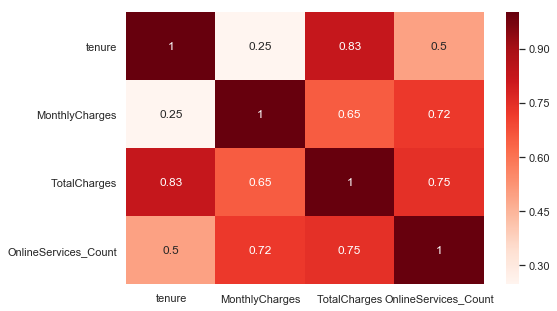

In [48]:
#show the correlation between numeric variables
plt.figure(figsize=(8,5))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
df3 = df2.copy()
unwanted_list = ['customerID', 'tenure', 'InternetService']
df3 = df3.drop(unwanted_list, axis=1)
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_var :
    df3[i] = le.fit_transform(df3[i])
    
#One hot encoding for multi level columns
df3 = pd.get_dummies(data = df3, columns = multi_var)

In [50]:
scaler = StandardScaler()
df3[num_var] = scaler.fit_transform(df3[num_var])

In [51]:
df3.dtypes

gender                                       int32
SeniorCitizen                                int32
Partner                                      int32
Dependents                                   int32
PhoneService                                 int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
OnlineServices_Count                       float64
Internet                                     int32
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes              

## Data modeling
####Baseline MOdel: logistic regression
Accuracy   Score :  0.7969283276450512
Area under curve :  0.7064620485418142 

In [52]:
### Baseline Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test data 
features = df3.drop('Churn', axis=1).columns.tolist()
target_var = ['Churn']
X = df3[features]
y = df3[target_var]
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 2)
    

def churn_prediction(algorithm,X_training,X_testing,y_training,y_testing):
    
    algorithm.fit(X_training, y_training)
    predictions = algorithm.predict(X_testing)
    probabilities = algorithm.predict_proba(X_testing)
    print(algorithm)
    print("\n Classification report : \n", classification_report(y_testing,predictions))
    print("Accuracy   Score : ", accuracy_score(y_testing,predictions))
    print("Recall Score :", recall_score(y_testing,predictions))
    print("F1 Score :", f1_score(y_testing,predictions))                               
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_testing,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_testing,probabilities[:,1])
    #confusion matrix
    conf_matrix = confusion_matrix(y_testing,predictions)
    print("Confusion Matrix : \n", conf_matrix)

In [53]:
#Logistic Regression(parameters are default setting)
LR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                   max_iter=100, multi_class='ovr', verbose=0, warm_start=False, 
                   n_jobs=None, l1_ratio=None)

churn_prediction(LR,X_train,X_test,y_train,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy   Score :  0.7960199004975125
Recall Score : 0.5213903743315508
F1 Score : 0.5760709010339734
Area under curve :  0.7084202597698412 

Confusion Matrix : 
 [[925 108]
 [179 195]]


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [54]:
#Using SMOTE to oversample minority class
smote_X = df3[features]
smote_y = df3[target_var]
#Split train and test data
X_train,X_test,y_train,y_test = train_test_split(smote_X, smote_y, test_size = .2, random_state = 2)

#oversampling minority class using smote
smt = SMOTE(random_state = 0)
smt_X,smt_Y = smt.fit_sample(X_train,y_train)
smt_X = pd.DataFrame(data = smt_X,columns=features) #change array to dataframe
smt_Y = pd.DataFrame(data = smt_Y,columns=target_var)

LR_smote = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                   max_iter=100, multi_class='ovr', verbose=0, warm_start=False, 
                   n_jobs=None, l1_ratio=None)

churn_prediction(LR_smote,smt_X, X_test,smt_Y,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407

Accuracy   Score :  0.7547974413646056
Recall Score : 0.7967914438502673
F1 Score : 0.6333687566418703
Area under curve :  0.7681924305408161 

Confusion Matrix : 
 [[764 269]
 [ 76 298]]


In [55]:
#Applying NearMiss for undersampling majority class
nr_X = df3[features]
nr_y = df3[target_var]
#Split train and test data
X_train,X_test,y_train,y_test = train_test_split(nr_X, nr_y, test_size = .2, random_state = 2)

nr = NearMiss()
nr_X,nr_y = nr.fit_sample(X_train,y_train)
nr_X = pd.DataFrame(data = nr_X,columns=features) #change array to dataframe
nr_y = pd.DataFrame(data = nr_y,columns=target_var)

LR_nearmiss = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                   max_iter=100, multi_class='ovr', verbose=0, warm_start=False, 
                   n_jobs=None, l1_ratio=None)

churn_prediction(LR_nearmiss,nr_X,X_test,nr_y,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.61      0.72      1033
           1       0.41      0.75      0.53       374

    accuracy                           0.65      1407
   macro avg       0.64      0.68      0.62      1407
weighted avg       0.75      0.65      0.67      1407

Accuracy   Score :  0.6453447050461976
Recall Score : 0.7459893048128342
F1 Score : 0.5279091769157994
Area under curve :  0.677447701777182 

Confusion Matrix : 
 [[629 404]
 [ 95 279]]


In [56]:
#Using RFE(Recursive Feature Elimination) to select top 15 features
from sklearn.feature_selection import RFE
LR = LogisticRegression()
#Initializing RFE model
rfe = RFE(LR,15)
#Transforming data using RFE
rfe_fit = rfe.fit(smt_X,smt_Y.values.ravel())
temp = pd.DataFrame({"rfe_support": rfe_fit.support_, 
                     "columns": features,
                     "ranking": rfe_fit.ranking_})
selected_features_rfe = temp[temp['rfe_support']==True]['columns'].tolist()
tab = ff.create_table(temp)
plotly.offline.iplot(tab)
print("\nSelected Features :\n" , selected_features_rfe)


Selected Features :
 ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'tenure_category_0-12', 'tenure_category_24-36', 'tenure_category_36-48', 'tenure_category_48-60', 'tenure_category_above_60']


In [57]:
#Using selected features to fit Logitic Regression model
X_train_rfe = smt_X[selected_features_rfe]
y_train_rfe = smt_Y
X_test_rfe  = X_test[selected_features_rfe]
y_test_rfe  = y_test[target_var]

LR_rfe = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, 
            n_jobs=None, l1_ratio=None)
#applying model
churn_prediction(LR_rfe,X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

Accuracy   Score :  0.746268656716418
Recall Score : 0.7941176470588235
F1 Score : 0.6246056782334385
Area under curve :  0.7615312339843971 

Confusion Matrix : 
 [[753 280]
 [ 77 297]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

Accuracy   Score :  0.7803837953091685
Recall Score : 0.5401069518716578
F1 Score : 0.5666199158485272
Area under curve :  0.7037417624798753 

Confusion M

Text(0, 0.5, 'Feature Importance Score')

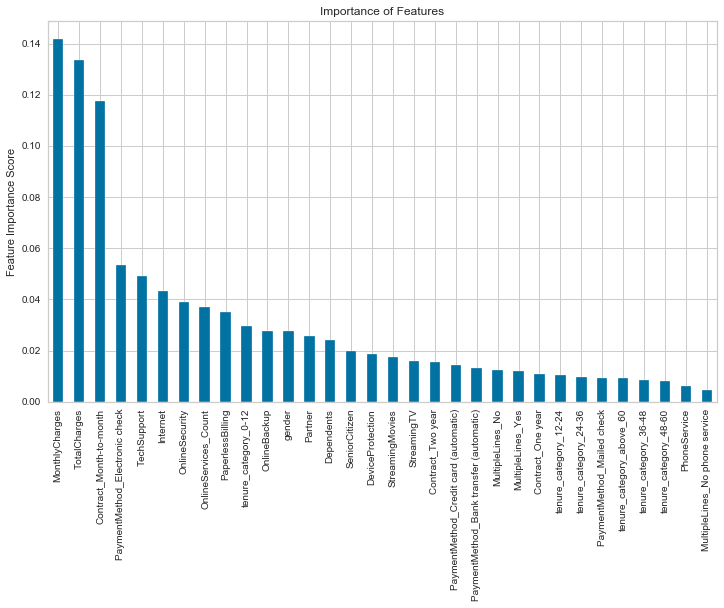

In [58]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(12,7))

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
        min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
            random_state=None, verbose=0, warm_start=False, class_weight=None)

churn_prediction(rf,smt_X,X_test,smt_Y,y_test)
predictors=list(smt_X)

feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [59]:
#Grid Search for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#Create Pipeline With Model Selection Search Space
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

In [60]:
#Create Model Selection Using Grid Search
# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
#Conduct Model Selection Using Grid Search
# Fit grid search
best_model = clf.fit(smt_X, smt_Y)

In [61]:
#View Best Model And Its Best Hyperparameters
# View best model
best_model.best_estimator_.get_params()['classifier']
#Predict Using Best Model
# Predict target vector
best_model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [62]:
clf_best_model = best_model
churn_prediction(clf_best_model,smt_X,X_test,smt_Y,y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
               

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
churn_prediction(knn,smt_X,X_test,smt_Y,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      1033
           1       0.46      0.78      0.58       374

    accuracy                           0.69      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.78      0.69      0.71      1407

Accuracy   Score :  0.6943852167732765
Recall Score : 0.7807486631016043
F1 Score : 0.5759368836291913
Area under curve :  0.7219328988305698 

Confusion Matrix : 
 [[685 348]
 [ 82 292]]


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

Accuracy   Score :  0.7718550106609808
Recall Score : 0.56951871657754
F1 Score : 0.570281124497992
Area under curve :  0.7073150214059045 

Confusion Matrix : 
 [[873 160]
 [161 213

Text(0, 0.5, 'Feature Importance Score')

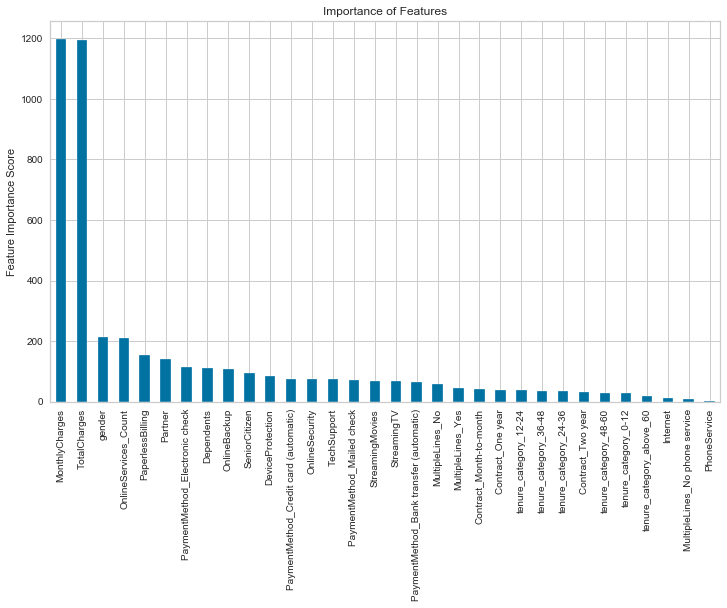

In [64]:
#LGB Classifier
from lightgbm import LGBMClassifier
plt.figure(figsize=(12,7))
lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

#cols = [i for i in .columns if i not in Id_col + target_col]
churn_prediction(lgbm_c,smt_X,X_test,smt_Y,y_test)
feat_imp = pd.Series(lgbm_c.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [65]:
# Set params
# Scores ~0.784 (without tuning and early stopping)
import lightgbm as lgb
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

# Create parameters to search
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# To view the default model params:
mdl.get_params().keys()

# Create the grid
Lgb = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)
# Fit grid search
best_model = Lgb.fit(smt_X, smt_Y)
#View Best Model And Its Best Hyperparameters
# View best model
best_model.best_estimator_.get_params()
#Predict Using Best Model
# Predict target vector
best_model.predict(X_test)
Lgb_best_model= best_model
churn_prediction(Lgb_best_model,smt_X,X_test,smt_Y,y_test)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=512,
                                      max_depth=-1, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_estimators=100, n_jobs=3, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0...
             iid='warn', n_jobs=2,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.66],
                         'learning_rate': [0.005], 'n_estimators': [40],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
             

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.56      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Accuracy   Score :  0.7668798862828714
Recall Score : 0.5614973262032086
F1 Score : 0.5614973262032086
Area under curve :  0.7013682177966671 

Confusion Matrix : 
 [[869 164]

Text(0, 0.5, 'Feature Importance Score')

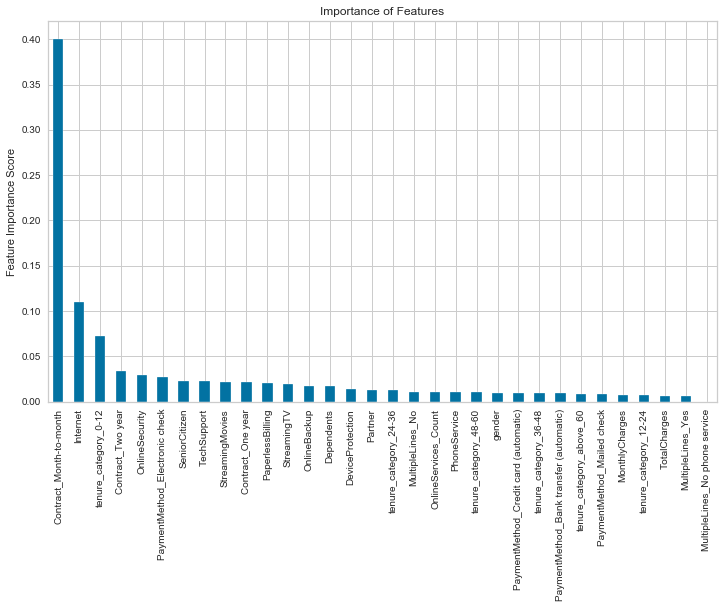

In [66]:
#XGB Classifier
from xgboost import XGBClassifier
plt.figure(figsize=(12,7))
xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


churn_prediction(xgc,smt_X,X_test,smt_Y,y_test)

feat_imp = pd.Series(xgc.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [68]:
#model report for 10 models used
def model_report(model,X_training,X_testing,y_training,y_testing,name) :
    model.fit(X_training,y_training)
    predictions  = model.predict(X_testing)
    accuracy = accuracy_score(y_testing,predictions)
    recall = recall_score(y_testing,predictions)
    precision    = precision_score(y_testing,predictions)
    f1score      = f1_score(y_testing,predictions)
    roc_auc      = roc_auc_score(y_testing,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recall],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc]
                      })
    return df
#outputs for every model
model1 = model_report(LR,X_train,X_test,y_train,y_test,
                      "LR(Baseline_model)")
model2 = model_report(LR_smote,smt_X,X_test,smt_Y,y_test,
                       "LR(SMOTE)")
model3 = model_report(LR_nearmiss,nr_X,X_test,nr_y,y_test,
                      "LR(NearMiss)")
model4 = model_report(LR_rfe,X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe,
                      "LR(RFE)")
model5 = model_report(knn,smt_X,X_test,smt_Y,y_test,"KNN Classifier")
model6 = model_report(rf,smt_X,X_test,smt_Y,y_test,"Random Forest")

model7 = model_report(clf_best_model,smt_X,X_test,smt_Y,y_test,
                      "RandomForest(GridSearch)")
model8 = model_report(lgbm_c,smt_X,X_test,smt_Y,y_test,
                      "LGBM Classifier")
model9 = model_report(Lgb_best_model,smt_X,X_test,smt_Y,y_test,
                      "LGBM(GridSearch)")
model10 = model_report(xgc,smt_X,X_test,smt_Y,y_test,
                      "XGBoost Classifier")
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                               model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

plotly.offline.iplot(table)

From this model report, we can find that Logistic Regression model using SMOTE sampling method and LightGBM with Grid Search have highers Recall score, f1 score and ROC score. As such, I would like to explore more with these two models.

In the future, I would like to build pipelines and then perform data preprocessing(scaling and sampling) within cross validation folds in order to prevent the data leakage. And I also plan to used more advanced models such as neural networks.